In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy

### Import LDA document vectors

In [4]:
gv_matrix = np.load('../../processed_files/glove/gv_matrix.npy')
df = pickle.load(open("../../processed_files/webis/df.pickle", "rb"))

In [5]:
gv_matrix.shape

(15718, 300)

In [6]:
df.head()

,file_number,file_type,filename,text,paraphrase,text_processed,text_processed_stemmed
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[comte, would, advise, irrational, proceeding,...",[m. comte would not advise so irrational a pro...
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even, comte, would, spurn, irrational, reason...",[even m. comte would spurn such irrational rea...
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[picture, illustrating, shortest, easiest, way...",[picture illustrating the shortest and easiest...
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[picture, exemplifies, straight, easiest, way,...",[this picture exemplifies the straight and eas...
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, course, bill, going, get, sooner, later...","[thad, of course. and, bill, we're going to ge..."


In [7]:
df.shape

(15718, 7)

In [8]:
type(gv_matrix[0])

numpy.ndarray

In [9]:
np.average(gv_matrix[[0, 1, 2]], axis=0)

array([-1.19000530e-01,  6.50377103e-02, -1.29021334e-01, -1.37842166e-01,
        5.42210042e-03,  3.06852100e-02, -5.76209563e-02,  8.05141870e-02,
        5.74919600e-02,  1.71693234e+00, -2.77417001e-02,  1.86089640e-01,
        8.52958374e-02, -1.64914143e-03, -1.44523874e-01, -4.83476942e-02,
       -1.85398857e-01,  7.32365708e-01, -4.67102909e-02, -1.98900988e-02,
        7.39726871e-02, -1.31824693e-02, -1.57900517e-01,  5.79300858e-02,
        1.82141835e-02,  3.67756672e-02,  1.28265272e-01, -8.70508999e-02,
        1.61883576e-02, -1.17049621e-01, -9.13343355e-02,  1.54655520e-01,
        4.68524471e-02,  1.45371378e-02,  3.22945019e-02, -6.59103728e-02,
        2.64518556e-02, -1.04709801e-01, -6.13234589e-02, -5.61140242e-02,
       -7.25538880e-02, -1.10376117e-01, -4.96736135e-02,  9.26112634e-02,
        1.59961482e-01,  1.61350351e-02, -6.94811996e-03,  3.60240756e-03,
        4.71605081e-03, -1.87934710e-02,  6.01553631e-02,  1.11417284e-01,
       -7.24684000e-02, -

## DB Scan

In [10]:
from sklearn.cluster import DBSCAN

In [11]:
# eps (default 0.5): the maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples (default 5): number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself
# algorithm (default 'auto'): ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’
dbscan = DBSCAN(eps = 0.1, min_samples = 5).fit(gv_matrix)

In [12]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [13]:
num_clusters = max(dbscan.labels_)
num_clusters

461

In [14]:
dbscan

DBSCAN(eps=0.1)

In [15]:
index_cluster = zip(range(len(dbscan.labels_)), dbscan.labels_)
index_cluster_dict = dict(index_cluster)
index_cluster_dict[456]

-1

In [16]:
cluster_index = list(zip(dbscan.labels_, range(len(dbscan.labels_))))

In [17]:
cluster_list = dict()
for i in range(num_clusters):
    cluster_list[i] = list(filter(lambda row: row[0] == i, cluster_index))

In [18]:
for i in range(num_clusters):
    print('cluster: ', i, 'size: ', len(cluster_list[i]))

cluster:  0 size:  336
cluster:  1 size:  5
cluster:  2 size:  5
cluster:  3 size:  5
cluster:  4 size:  5
cluster:  5 size:  5
cluster:  6 size:  5
cluster:  7 size:  52
cluster:  8 size:  5
cluster:  9 size:  5
cluster:  10 size:  7
cluster:  11 size:  5
cluster:  12 size:  5
cluster:  13 size:  5
cluster:  14 size:  5
cluster:  15 size:  5
cluster:  16 size:  9
cluster:  17 size:  5
cluster:  18 size:  5
cluster:  19 size:  5
cluster:  20 size:  5
cluster:  21 size:  6
cluster:  22 size:  7
cluster:  23 size:  5
cluster:  24 size:  8
cluster:  25 size:  6
cluster:  26 size:  5
cluster:  27 size:  13
cluster:  28 size:  7
cluster:  29 size:  11
cluster:  30 size:  6
cluster:  31 size:  6
cluster:  32 size:  8
cluster:  33 size:  6
cluster:  34 size:  5
cluster:  35 size:  8
cluster:  36 size:  5
cluster:  37 size:  8
cluster:  38 size:  5
cluster:  39 size:  12
cluster:  40 size:  7
cluster:  41 size:  11
cluster:  42 size:  8
cluster:  43 size:  5
cluster:  44 size:  6
cluster:  45 

cluster:  378 size:  9
cluster:  379 size:  5
cluster:  380 size:  5
cluster:  381 size:  6
cluster:  382 size:  10
cluster:  383 size:  6
cluster:  384 size:  5
cluster:  385 size:  5
cluster:  386 size:  13
cluster:  387 size:  5
cluster:  388 size:  7
cluster:  389 size:  5
cluster:  390 size:  7
cluster:  391 size:  7
cluster:  392 size:  6
cluster:  393 size:  5
cluster:  394 size:  10
cluster:  395 size:  6
cluster:  396 size:  7
cluster:  397 size:  7
cluster:  398 size:  5
cluster:  399 size:  6
cluster:  400 size:  5
cluster:  401 size:  8
cluster:  402 size:  7
cluster:  403 size:  7
cluster:  404 size:  5
cluster:  405 size:  6
cluster:  406 size:  5
cluster:  407 size:  5
cluster:  408 size:  6
cluster:  409 size:  6
cluster:  410 size:  8
cluster:  411 size:  6
cluster:  412 size:  7
cluster:  413 size:  6
cluster:  414 size:  6
cluster:  415 size:  6
cluster:  416 size:  8
cluster:  417 size:  6
cluster:  418 size:  6
cluster:  419 size:  5
cluster:  420 size:  6
cluster:

In [19]:
len(cluster_list[0])

336

In [20]:
len(cluster_list[1])

5

In [21]:
len(cluster_list[2])

5

In [22]:
len(cluster_list[num_clusters-1])

6

In [23]:
cluster_list[1]

[(1, 258), (1, 260), (1, 262), (1, 263), (1, 14718)]

In [24]:
[i[1] for i in cluster_list[0]]

[109,
 149,
 433,
 467,
 537,
 681,
 873,
 915,
 2033,
 2043,
 2993,
 3075,
 3425,
 4367,
 4789,
 5463,
 5469,
 5485,
 6115,
 6375,
 7127,
 7409,
 7579,
 7655,
 7741,
 7793,
 7903,
 7931,
 7971,
 8075,
 8145,
 8169,
 8257,
 8329,
 8449,
 8461,
 8517,
 8559,
 8569,
 8721,
 9087,
 9195,
 9249,
 9319,
 9597,
 9653,
 9831,
 9879,
 9897,
 9929,
 9933,
 10013,
 10107,
 10141,
 10147,
 10233,
 10273,
 10321,
 10361,
 10427,
 10473,
 10587,
 10685,
 10703,
 10721,
 10725,
 10815,
 10831,
 11485,
 11673,
 11693,
 11859,
 12023,
 12109,
 12193,
 12437,
 12451,
 12453,
 12457,
 12463,
 12477,
 12485,
 12499,
 12503,
 12513,
 12515,
 12517,
 12529,
 12531,
 12541,
 12545,
 12551,
 12573,
 12583,
 12589,
 12607,
 12613,
 12621,
 12633,
 12647,
 12651,
 12655,
 12661,
 12677,
 12681,
 12685,
 12705,
 12711,
 12715,
 12719,
 12727,
 12733,
 12747,
 12751,
 12763,
 12769,
 12775,
 12781,
 12791,
 12793,
 12805,
 12809,
 12821,
 12831,
 12833,
 12847,
 12853,
 12865,
 12871,
 12877,
 12887,
 12901,
 12

In [25]:
import statistics

# index is cluster index
def intracluster_similarity(index):
    cluster_centroid = np.average(gv_matrix[[i[1] for i in cluster_list[index]]], axis=0)
    dist_list = []
    cluster = cluster_list[index]
    for i in cluster:
        distance = np.linalg.norm(cluster_centroid-gv_matrix[i[1]])
        dist_list.append(distance)
        
    #avg = sum_dist/(len(indices[index])-1)
    avg = np.average(dist_list)

    #variance = statistics.variance(dist_list)
    variance = np.var(dist_list)
    
    return avg, variance

In [26]:
intracluster_similarity(0)

(0.0, 0.0)

In [27]:
intracluster_similarity(1)

(0.0, 0.0)

In [28]:
# index is cluster / cluster id
def generate_raw_content_cluster_df(index):
    index_list = cluster_list[index]
    index_list = [x[1] for x in index_list]
    cluster_seed = df.loc[index].to_frame().T
    #cluster_df = df.loc[index_list[1:]]
    cluster_df = df.loc[index_list[1:]]
    combined = pd.concat([cluster_seed, cluster_df])
    combined['cluster'] = index
    return combined

In [29]:
generate_raw_content_cluster_df(30)

,file_number,file_type,filename,text,paraphrase,text_processed,text_processed_stemmed,cluster
30,1011,original.txt,1011-original.txt,"The barriers of his conceit, his coolness, his...",True,"[barriers, conceit, coolness, hudacity, broken...","[the barriers of his conceit, his coolness, hi...",30
5060,3276,original.txt,3276-original.txt,For the Chorus-Singers were never elected by S...,False,"[chorussingers, never, elected, suffrage, hir’...",[for the chorus-singers were never elected by ...,30
5061,3276,paraphrase.txt,3276-paraphrase.txt,For the Chorus-Singers were never elected by S...,False,"[chorussingers, never, elected, suffrage, hir’...",[for the chorus-singers were never elected by ...,30
5062,3277,original.txt,3277-original.txt,For the Chorus-Singers were never elected by S...,False,"[chorussingers, never, elected, suffrage, hir’...",[for the chorus-singers were never elected by ...,30
5063,3277,paraphrase.txt,3277-paraphrase.txt,For the Chorus-Singers were never elected by S...,False,"[chorussingers, never, elected, suffrage, hir’...",[for the chorus-singers were never elected by ...,30
5064,3278,original.txt,3278-original.txt,For the Chorus-Singers were never elected by S...,False,"[chorussingers, never, elected, suffrage, hir’...",[for the chorus-singers were never elected by ...,30


In [30]:
avg_list = []
variance_list = []

for i in range(num_clusters):
    avg, variance = intracluster_similarity(i)
    avg_list.append(avg)
    variance_list.append(variance)
    #print()

([<matplotlib.axis.XTick at 0x142bad588>,
 <a list of 11 Text xticklabel objects>)

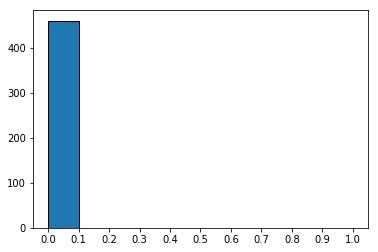

In [31]:
# neighbors = 10
bins= [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.hist(avg_list, bins=bins, edgecolor="k")
plt.xticks(bins)

## Intercluster Similarity

In [32]:
def intercluster_dist():
    indices = range(num_clusters)
    centroid_centroid_distance = {}
    values = []
    for i in indices:
        for j in indices:
            if i < j:
                key = str(i) + "::" + str(j)
                cluster_centroid_i = np.average(gv_matrix[[x[1] for x in cluster_list[i]]], axis=0)
                cluster_centroid_j = np.average(gv_matrix[[x[1] for x in cluster_list[j]]], axis=0)
                distance = np.linalg.norm(cluster_centroid_i - cluster_centroid_j)
                centroid_centroid_distance[key] = distance
                values.append(distance)
    return centroid_centroid_distance, values

In [33]:
intercluster_distances, values = intercluster_dist()
#print('distances', values)
print('average', np.average(values))

average 1.5498630009056653
